# Final Project:  Data Cleaning and Simulations!!

Welcome to our final project  our team is __**Zane, Kenadi, and AJ**__ !!

We wanted to study what factors affect song popularity and wanted to run a simulation to predict popularity based on these factors. 
Before we start this was our main hypothesis.

We looked at the data and saw many different measures such as available markets, duration, and spotify metrics (loudness, liveness, danceability, energy, acousticness, valence)
Valence is the general positive or negative feel of the song (0.0 to 1.0)!! 

Ex) a song of 0 valence is very negative -- a song of 1 valence is very happy sounding.
***
#### **Hypothesis**: We predict more popular artists will have a larger fan bases and will be more popular. We also predict that Spotify's danceability/energy predictors are positively correlated the popularity, yet this is influenced by other data such as marketing and genre which is not found in our data set.

Here is our cleaning of the data

In [21]:
#!pip install --upgrade altair

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
import os
os.getcwd()

'/Users/kenadipearson/Desktop/GitHub/Simulations_Project'

In [24]:
df=pd.read_csv('spotify_data_1986_2023.csv') #import dataset
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'track_name', 'popularity',
       'available_markets', 'disc_number', 'duration_ms', 'explicit',
       'track_number', 'href', 'album_id', 'album_name', 'album_release_date',
       'album_type', 'album_total_tracks', 'artists_names', 'artists_ids',
       'principal_artist_id', 'principal_artist_name', 'artist_genres',
       'principal_artist_followers', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'year', 'duration_min'],
      dtype='object')


## Remove Irrelevant Columns

In [25]:
dropping = ['Unnamed: 0.1', 'Unnamed: 0', 'href', 'artists_ids', 'principal_artist_id', 'analysis_url', 'album_id'] #drop irrelevant columns
df = df.drop(dropping, axis = 1)
df

track_id                             track_name  \
0      2A6yzRGMgSQCUapR2ptm6A                            True Colors   
1      3gKwVWwKmeuFtPubICbOGc                            Paul Revere   
2      2tY1gxCKslfXLFpFofYmJQ                           Brass Monkey   
3      31dqpLUModJWNbxrXu6TWd                       Shot in the Dark   
4      00vYs0qZA40Z8AAaN7xmMO                           Manic Monday   
...                       ...                                    ...   
11445  4nrPB8O7Y7wsOCJdgXkthe  Shakira: Bzrp Music Sessions, Vol. 53   
11446  7Lkxvfl2rkNYWS4kBDCQtN                             Las Morras   
11447  6UoKX6uLJwhsnyTp5k5StP                            The Painter   
11448  4ZYAU4A2YBtlNdqOUtc7T2                     Red Ruby Da Sleeze   
11449  5vZoQQ1hH5L2s4Y8G86ksg       Angels (Don’t Always Have Wings)   

       popularity                                  available_markets  \
0              73  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
1              61  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
2              68  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
3              66  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
4              63       AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US   
...           ...                                                ...   
11445          89  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
11446          81  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
11447          75  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
11448          78  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   
11449          74  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...   

       disc_number  duration_ms  explicit  track_number  \
0                1       227600     False             4   
1                1       220840     False             9   
2                1       157440     False            11   
3                1       256293     False             9   
4                1       184160     False             1   
...            ...          ...       ...           ...   
11445            1       214945     False             1   
11446            1       155550      True             1   
11447            1       211413     False             1   
11448            1       214445      True             1   
11449            1       200426     False             1   

                                  album_name   album_release_date  ...  key  \
0                                True Colors  1986-10-14 00:00:00  ...  0.0   
1                            Licensed To Ill  1986-11-15 00:00:00  ...  6.0   
2                            Licensed To Ill  1986-11-15 00:00:00  ...  6.0   
3                           The Ultimate Sin  1986-02-22 00:00:00  ...  6.0   
4         Different Light (Expanded Edition)  1986-01-01 00:00:00  ...  2.0   
...                                      ...                  ...  ...  ...   
11445  Shakira: Bzrp Music Sessions, Vol. 53  2023-01-11 00:00:00  ...  2.0   
11446                             Las Morras  2023-04-04 00:00:00  ...  9.0   
11447                            The Painter  2023-08-11 00:00:00  ...  2.0   
11448                     Red Ruby Da Sleeze  2023-03-03 00:00:00  ...  1.0   
11449       Angels (Don’t Always Have Wings)  2023-01-20 00:00:00  ...  1.0   

       liveness loudness mode speechiness    tempo  time_signature  valence  \
0        0.1160  -13.155  1.0      0.0331  171.282             4.0    0.268   
1        0.2280  -13.232  0.0      0.9440   91.753             4.0    0.578   
2        0.0992   -8.435  0.0      0.3300  116.371             4.0    0.655   
3        0.1420   -7.262  1.0      0.0324  123.887             3.0    0.619   
4        0.3580  -10.906  1.0      0.0289  121.761             4.0    0.853   
...         ...      ...  ...         ...      ...             ...      ...   
11445    0.0915   -5.600  0.0      0.0493  122.104             4.0    0.498   
1

## Look at the amount of letters and amount of words in the track name

### First let's drop the duplicates

In [26]:
df.drop_duplicates(subset='track_name', inplace=True) #first drop duplicates
df[df['track_name'] == "Gonna Make You Sweat (Everybody Dance Now) (feat. Freedom Williams)"] #check it worked, yay it did!

track_id  \
1246  7eheoW4hxrH51ww2QePVwF   

                                             track_name  popularity  \
1246  Gonna Make You Sweat (Everybody Dance Now) (fe...          71   

                                      available_markets  disc_number  \
1246  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   

      duration_ms  explicit  track_number  album_name   album_release_date  \
1246       244093     False             1  Super Hits  1990-01-01 00:00:00   

      ...  key  liveness loudness mode speechiness    tempo  time_signature  \
1246  ...  6.0     0.183   -7.405  1.0      0.0935  112.187             4.0   

      valence  year  duration_min  
1246    0.794  1990      4.068217  

[1 rows x 30 columns]

### Now let's start looking at the names, there are some special cases to see that we don't want counted when we sum the letters

In [27]:
special_cases = df[
    df['track_name'].str.contains(r'\([A-Za-z0-9 ].*\)$', regex=True) | #has parentheses
    df['track_name'].str.contains(r'-\s*[A-Za-z].*$', regex=True) | #has a dash
    df['track_name'].str.contains(r':\s*[A-Za-z].*$', regex=True) #has a colon
]

# Show only the track_name column
print(special_cases['track_name'])

print(len(special_cases))

26                                    Battery (Remastered)
27                          Master of Puppets (Remastered)
31                                Only You (And You Alone)
34       Holding Out for a Hero - From "Footloose" Soun...
47                         Walk This Way (feat. Aerosmith)
                               ...                        
11429                            Pull Up (feat. 21 Savage)
11430                                   MONTAGEM - PR FUNK
11444         AMERICA HAS A PROBLEM (feat. Kendrick Lamar)
11445                Shakira: Bzrp Music Sessions, Vol. 53
11449                     Angels (Don’t Always Have Wings)
Name: track_name, Length: 1696, dtype: object
1696


##### So it looks like there are 1696 cases, wow that is a lot!

### Let's try to remove all of the irrelevant ones while keeping things like "(Live)" or parts of the title like "Only You (And You Alone)"	

In [28]:
### clean track names
import re

df['clean_track_name'] = df['track_name'].str.replace(
    r'\s*(\((?:feat\.?|featuring|with)[^)]*\)|\([^)]*(revisited|remaster(?:ed)?)[^)]*\)|[-–—].*|:.*)$',
    '',
    regex=True,
    flags=re.IGNORECASE, #replaces my key words regardless of if it is capital or lowercase
).str.strip()

# note for str.replace:
# \s*                         → optional spaces before extra info
# \( ... \)                   → matches parentheses
# (?:feat\.?|featuring|with)  → only removes parentheses if they start with "feat", "feat.", or "featuring", or "with"
# [^)]*                       → match everything inside the parentheses until the closing parenthesis
# \([^)]*(revisited|remaster(?:ed)?)[^)]*  → removes parentheses containing "revisited", "remaster", or "remastered" anywhere inside
# [-–—].*                      → match a dash (-), en dash (–), or em dash (—) and everything after it (at the end)
# :.*                          → match a colon and everything after it (at the end)
# $                            → only match at the end of the string
# flags=re.IGNORECASE          → makes regex case-insensitive (so "Remastered" is matched)
# .str.strip()                 → removes extra spaces left at the beginning or end

#move clean tarck name so it is next to track name
clean_col = df.pop('clean_track_name')
df.insert(2, 'clean_track_name', clean_col)

### Count letters can make new column!

# Count letters + numbers (all languages)
letter_num_count = df['clean_track_name'].apply(lambda x: sum(c.isalnum() for c in str(x)))

# Remove existing column if it already is there - this will let me edit the code above without it giving me an error that the column already exists
if 'letters_track_name' in df.columns:
    df.drop(columns='letters_track_name', inplace=True)

# Insert next to clean track name column so I can see them side by side
df.insert(3, 'letters_track_name', letter_num_count)

#look at it to check :)
pd.set_option('display.max_rows', 50)
df[['track_name', 'clean_track_name', "letters_track_name"]].sample(50, random_state=42) #show me a random 50 so I can check my work

track_name  \
5634         A Boy Brushed Red Living In Black And White   
9756                                          Unbothered   
1348                                        Is She Weird   
4171                                            Unpretty   
1893                                      Black or White   
4594                                 Yo No Soy Esa Mujer   
3820                                Quizás Si, Quizás No   
8452                                            r - Cali   
11004                                 No Se Va - EN VIVO   
6809                                               二十歳の恋   
8955                                Delusions of Saviour   
33                                      Talk Dirty To Me   
11127                                  PAINTING PICTURES   
3383                                          Jump On It   
7498                                      The Resistance   
2651                                  Y Es Que La Quiero   
5266                     Such Great Heights - Remastered   
7166                Evacuate The Dancefloor - Radio Edit   
3785                      Da Art of Storytellin' (Pt. 1)   
10181                                       Another Life   
9658                                         Blue Tacoma   
3692   A Spoonful of Sugar - From "Mary Poppins" / So...   
5032                               I Can See Clearly Now   
4151                                        Un Desengaño   
5181                                     Don't Forget Me   
5440                                           Figure.09   
10969  Vegas (From the Original Motion Picture Soundt...   
556                                             Moonglow   
8073      Inténtalo (feat. América Sierra & El Bebeto)   
1378                                          The Ghetto   
2984                                       Secret Garden   
3973   Así Fue - En Vivo [Desde el Instituto Nacional...   
3994                                            the city   
1140                                     Seven Year Ache   
1466                                      Tiempo De Vals   
3968                                  Feelin' Good Again   
10350                              GIVE HEAVEN SOME HELL   
9678                                El Color de Tus Ojos   
9137                                       Party Monster   
7615                                 Rolling in the Deep   
2684                                Hang on to Your Love   
9271                         walk away as the door slams   
1369                              Something's Gotta Give   
10530                         BookBag 2.0 (feat. Polo G)   
2317                                 Take The Power Back   
2018                                Drivin' My Life Away   
321                                Welcome To The Jungle   
5605                              Ain't No Use in Tryin'   
10333                                     Romantic Lover   
7207                                      Help I'm Alive   

                                        clean_track_name  letters_track_name  
5634         A Boy Brushed Red Living In Black And White                  35  
9756                                          Unbothered                  10  
1348                                        Is She Weird                  10  
4171                                            Unpretty                   8  
1893                                      Black or White                  12  
4594                                 Yo No Soy Esa Mujer                  15  
3820                                Quizás Si, Quizás No                  16  
8452                                                   r                   1  
11004                                           No Se Va                   6  
6809                                               二十歳の恋                   5  
8955                                Delusions of Saviour                  18  
33                                   

##### Okay so it is not perfect, there are some weird exceptions but that is okay. I got most of the stuff out. Let me look at the full data set again just for clarity.

In [29]:
df.sample(10, random_state=46)

track_id                            track_name  \
10915  3k3NWokhRRkEPhCzPmV8TW                         Ojitos Lindos   
3950   1fotoYONO343JjbC8XvPSl                       Moment Of Truth   
4714   6uRH1qMz30ZBwwUG0IYE5s                         Dance With Me   
6885   4gzeYkzuzxuzAUTsGcdjqA        It Won't Be Like This For Long   
5544   3xrn9i8zhNZsTtcoWgQEAd                     Since U Been Gone   
8017   24LS4lQShWyixJ0ZrJXfJ5  Sweet Nothing (feat. Florence Welch)   
10395  3hLuHKzG1cmlRpq53ZVWd8                         The Good Ones   
7749   725NSbIej5lP3GfhLC7So3                                   115   
8224   4sebUbjqbcgDSwG6PbSGI0                  Come a Little Closer   
3530   6cKWDVak6o362TElLvwtmU                   Suavecito Suavecito   

                     clean_track_name  letters_track_name  popularity  \
10915                   Ojitos Lindos                  12          89   
3950                  Moment Of Truth                  13          59   
4714                    Dance With Me                  11          65   
6885   It Won't Be Like This For Long                  23          63   
5544                Since U Been Gone                  14          75   
8017                    Sweet Nothing                  12          76   
10395                   The Good Ones                  11          76   
7749                              115                   3          68   
8224             Come a Little Closer                  17          75   
3530              Suavecito Suavecito                  18          67   

                                       available_markets  disc_number  \
10915  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
3950   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
4714   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
6885   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
5544   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
8017   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
10395  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
7749   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   
8224   AU;CA;CY;DO;HK;IS;MT;MX;NZ;TW;TR;US;ID;JP;RO;I...            1   
3530   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...            1   

       duration_ms  explicit  track_number  ...  key liveness loudness  mode  \
10915       258298     False            14  ...  3.0   0.5280   -5.745   0.0   
3950        247333      True             8  ...  6.0   0.3710   -5.282   0.0   
4714        231800     False             2  ...  9.0   0.0442   -6.365   1.0   
6885        219000     False             8  ...  4.0   0.1100   -6.001   1.0   
5544        188960     False             2  ...  0.0   0.1140   -5.406   1.0   
8017        212560     False            10  ...  8.0   0.0567   -3.942   0.0   
10395       215140     False             7  ...  2.0   0.1490   -5.023   1.0   
7749        228160     False            14  ...  8.0   0.1020   -3.808   1.0   
8224        229346     False             2  ...  1.0   0.1510   -1.786   0.0   
3530        225720     False             4  ...  0.0   0.0621  -11.398   1.0   

      speechiness    tempo time_signature  valence  year  duration_min  
10915      0.0413   79.928            4.0    0.268  2022      4.304967  
3950       0.2560   90.215            4.0    0.594  1998      4.122217  
4714       0.2030  101.628            4.0    0.611  2001      3.863333  
6885       0.0287  143.863            4.0    0.389  2008      3.650000  
5544       0.0334  131.000            4.0    0.404  2004      3.149333  
8017       0.1090  127.934            4.0    0.582  2012      3.542667  
10395      0.0259   89.957            4.0    0.331  2020      3.585667  
7749       0.1750  200.215            4.0    0.676  2011      3.802667  
8224       0.0327  148.038            4.0    0.304  2013      3.822433  
3530       0.0413   

##### Looks gorgeous :)

## Calculate how many countries the song is available in

In [30]:
# count the markets by taking everything between semicolons and making it a string ex: 'US', then count the amount of strings within this list
market_count = df['available_markets'].str.split(';').str.len()

# Remove existing column if it exists
if 'market_count' in df.columns:
    df.drop(columns='market_count', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('available_markets') + 1, 'market_count', market_count)

In [31]:
# Check dataset
df.sample(10, random_state=14)

track_id  \
443   7KA6U0WOHdGxWWLGPYN2Sb   
827   1Xf1lWBSml62NG1du3Ro14   
877   64IOxX7fXk89bMG2831w4G   
6849  4LloVtxNZpeh7q7xdi1DQc   
2083  00QAndVDVfNqNWYdWAhEan   
9823  4MXhiYIRDMGAuvZc5IFTwC   
7694  0Uybrtb766jul6WpkjqbID   
7203  76LGCP0g9nVknR7HD2Jjyp   
5387  5TpaWJKnuyA4MjzAbFXSTQ   
4454  4oPNN7syJYSjzDhRerF966   

                                             track_name  \
443                                 On the Turning Away   
827                                Just The Way You Are   
877                                        Goodbye Time   
6849  Free Fallin' - Live at the Nokia Theatre, Los ...   
2083        Who Wants To Live Forever - Remastered 2011   
9823                                       ASTROTHUNDER   
7694                                         Hard Times   
7203                           Not The American Average   
5387                  Damn! (feat. Lil' Jon) - Club Mix   
4454                        Untitled (How Does It Feel)   

                 clean_track_name  letters_track_name  popularity  \
443           On the Turning Away                  16          58   
827          Just The Way You Are                  16          66   
877                  Goodbye Time                  11          47   
6849                 Free Fallin'                  10          75   
2083    Who Wants To Live Forever                  21          50   
9823                 ASTROTHUNDER                  12          78   
7694                   Hard Times                   9          70   
7203     Not The American Average                  21          65   
5387       Damn! (feat. Lil' Jon)                  14          59   
4454  Untitled (How Does It Feel)                  21          60   

                                      available_markets  market_count  \
443   AR;AU;BO;BR;CA;CL;CO;CR;DO;EC;SV;GT;HN;HK;MY;M...         128.0   
827   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         184.0   
877   AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         184.0   
6849  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         184.0   
2083                                              CA;US           2.0   
9823  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         184.0   
7694  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         176.0   
7203  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         183.0   
5387  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;E...         183.0   
4454  AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...         184.0   

      disc_number  duration_ms  explicit  ...  key liveness loudness mode  \
443             1       341666     False  ...  7.0   0.0760  -12.135  1.0   
827             1       289106     False  ...  9.0   0.1490  -14.630  1.0   
877             1       207533     False  ...  2.0   0.1110  -17.392  1.0   
6849            1       263573     False  ...  5.0   0.7020  -13.262  1.0   
2083            1       295346     False  ...  4.0   0.1150   -8.670  0.0   
9823            1       142969      True  ...  4.0   0.1110   -8.111  0.0   
7694            1       178160     False  ...  7.0   0.1020  -13.641  1.0   
7203            1       279226      True  ...  2.0   0.2780   -4.106  0.0   
5387            1       298600      True  ...  6.0   0.3550   -5.799  0.0   
4454            1       430800     False  ...  4.0   0.0828   -9.975  0.0   

      speechiness    tempo time_signature valence  year  duration_min  
443        0.0300  100.454            4.0  0.2440  1987      5.694433  
827        0.0494   74.948            4.0  0.3090  1988      4.818433  
877        0.0317  147.117            4.0  0.2710  1988      3.458883  
6849       0.0315  173.509            4.0  0.4350  2008      4.392883  
2083       0.0361   87.476            5.0  0.0383  1991      4.922433  
9823       0.0661  151.901            4.0  0.2860  2018      2.382817  
7694       0.0333  133.230            3.0  0.4000  2011      2.969333  
7203       0.1930  184.975   

## Count how many artists made/are on the track

In [32]:
df['artists_names'].sample(5, random_state=16)

4930                                                 Trapt
5167                                                  Beck
6827     Angel Y Khriz;Gocho "El Lápiz De Platino";John...
10428    DJ Scheme;Ski Mask The Slump God;Danny Towers;...
322                                                   INXS
Name: artists_names, dtype: object

##### Looks like I can do the same thing I did for markets

In [33]:
df.columns.get_loc('artists_names')

15

In [34]:
# count the artists by taking everything between semicolons and making it a string ex: 'Taylor Swift', then count the amount of strings within this list
artist_numb = df['artists_names'].str.split(';').str.len()

# Remove existing column if it exists
if 'artist_numb' in df.columns:
    df.drop(columns='artist_numb', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('artists_names') + 1, 'artist_numb', artist_numb)

In [35]:
df.iloc[:, 16:21].sample(5, random_state=16) #look at the added column to check (before "," = all rows, show all the surrounding columns)

artist_numb principal_artist_name  \
4930             1                 Trapt   
5167             1                  Beck   
6827             3         Angel Y Khriz   
10428            4             DJ Scheme   
322              1                  INXS   

                                           artist_genres  \
4930              alternative metal;nu metal;post-grunge   
5167      alternative rock;anti-folk;permanent wave;rock   
6827                             latin hip hop;reggaeton   
10428                                          viral rap   
322    australian rock;dance rock;funk rock;new roman...   

       principal_artist_followers  acousticness  
4930                    1072711.0      0.000172  
5167                    1466809.0      0.260000  
6827                    1008284.0      0.184000  
10428                    254790.0      0.074000  
322                     2457267.0      0.071300

## Now calculate how many genres the main artist produces in 

In [36]:
df['artist_genres'].sample(5, random_state=16)

4930                alternative metal;nu metal;post-grunge
5167        alternative rock;anti-folk;permanent wave;rock
6827                               latin hip hop;reggaeton
10428                                            viral rap
322      australian rock;dance rock;funk rock;new roman...
Name: artist_genres, dtype: object

##### Again, looks like I can do the same thing I did for markets

In [37]:
df.columns.get_loc('artist_genres')

18

In [38]:
# count the genres by taking everything between semicolons and making it a string ex: 'Pop', then count the amount of strings within this list
genres_numb = df['artist_genres'].str.split(';').str.len()

# Remove existing column if it exists
if 'genres_numb' in df.columns:
    df.drop(columns='genres_numb', inplace=True)

# Insert next to markets for readibility
df.insert(df.columns.get_loc('artist_genres') + 1, 'genres_numb', genres_numb)

In [39]:
df.iloc[:, 19:24].sample(5, random_state=30) #look at the added column to check (before "," = all rows, show all the columns)

genres_numb  principal_artist_followers  acousticness  danceability  \
9624           2.0                  50572176.0        0.0185         0.704   
2879           5.0                    683645.0        0.0287         0.754   
398            8.0                    632734.0        0.0139         0.927   
11374          1.0                   6957293.0        0.2800         0.415   
8315           3.0                   5646381.0        0.0737         0.343   

       energy  
9624    0.859  
2879    0.785  
398     0.832  
11374   0.573  
8315    0.536

## Now let's look at the album release date and do some stuff with that

In [40]:
df['album_release_date'].sample(5, random_state=16)

4930     2002-11-05 00:00:00
5167     2002-01-01 00:00:00
6827     2008-01-01 00:00:00
10428    2020-12-04 00:00:00
322      1987-01-01 00:00:00
Name: album_release_date, dtype: object

##### Let's figure out the month and day of the week they were released in. Right now we only have this format 1986-10-14 00:00:00.

In [41]:
df.columns.get_loc('album_release_date')

12

In [42]:
# change column is datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

# Create new columns
df['release_month'] = df['album_release_date'].dt.month
df['release_weekday'] = df['album_release_date'].dt.weekday

#move columns to be next to the original album release date one
month_col = df.pop('release_month')
df.insert(df.columns.get_loc('album_release_date') + 1, 'release_month', month_col)

weekday_col = df.pop('release_weekday')
df.insert(df.columns.get_loc('album_release_date') + 2, 'release_weekday', weekday_col)

In [43]:
df.iloc[:, 10:16].sample(5, random_state=30) #look at the added column to check (before "," = all rows, show all the columns)

track_number                           album_name album_release_date  \
9624              1      Finesse (Remix) [feat. Cardi B]         2017-12-20   
2879              4  Labcabincalifornia (Deluxe Edition)         1995-01-01   
398              13          The Whispers: Greatest Hits         1987-01-01   
11374            36                  One Thing At A Time         2023-03-03   
8315              8                        PARTYNEXTDOOR         2013-07-01   

       release_month  release_weekday   album_type  
9624              12                2       single  
2879               1                6        album  
398                1                3  compilation  
11374              3                4        album  
8315               7                0        album

##### Okay cool. Lastly, release year is at the end of the data set right now but it kinda goes with these things so I'm gonna move it.

In [44]:
release_year = df.pop('year')
df.insert(df.columns.get_loc('album_release_date') + 3, 'year', release_year)

In [45]:
df.iloc[:, 10:16].sample(5, random_state=30) #check again

track_number                           album_name album_release_date  \
9624              1      Finesse (Remix) [feat. Cardi B]         2017-12-20   
2879              4  Labcabincalifornia (Deluxe Edition)         1995-01-01   
398              13          The Whispers: Greatest Hits         1987-01-01   
11374            36                  One Thing At A Time         2023-03-03   
8315              8                        PARTYNEXTDOOR         2013-07-01   

       release_month  release_weekday  year  
9624              12                2  2017  
2879               1                6  1995  
398                1                3  1987  
11374              3                4  2023  
8315               7                0  2013

## Okay, now I feel like our data set has some good information! Let's just check for N/As to clean it up completely.

In [46]:
df.isna().sum()

track_id                        0
track_name                      0
clean_track_name                0
letters_track_name              0
popularity                      0
available_markets               1
market_count                    1
disc_number                     0
duration_ms                     0
explicit                        0
track_number                    0
album_name                      0
album_release_date              0
release_month                   0
release_weekday                 0
year                            0
album_type                      0
album_total_tracks              0
artists_names                   0
artist_numb                     0
principal_artist_name           0
artist_genres                 105
genres_numb                   105
principal_artist_followers      0
acousticness                    5
danceability                    5
energy                          5
instrumentalness                5
key                             5
liveness      

##### For genres I think I will just put the median because I don't want to drop all those rows but for the others I think I will drop them for ease

In [47]:
print(df['genres_numb'].median())
df['genres_numb'] = df['genres_numb'].fillna(df['genres_numb'].median())

3.0


##### I am just gonna drop the rest now

In [48]:
df = df.dropna()

##### Let's check

In [49]:
df.isna().sum()

track_id                      0
track_name                    0
clean_track_name              0
letters_track_name            0
popularity                    0
available_markets             0
market_count                  0
disc_number                   0
duration_ms                   0
explicit                      0
track_number                  0
album_name                    0
album_release_date            0
release_month                 0
release_weekday               0
year                          0
album_type                    0
album_total_tracks            0
artists_names                 0
artist_numb                   0
principal_artist_name         0
artist_genres                 0
genres_numb                   0
principal_artist_followers    0
acousticness                  0
danceability                  0
energy                        0
instrumentalness              0
key                           0
liveness                      0
loudness                      0
mode    

##### BEAUTIFUL!!!!

## Run a Multiple Linear Regression to see which variables might affect song popularity!

In [50]:
print(df.columns)

Index(['track_id', 'track_name', 'clean_track_name', 'letters_track_name',
       'popularity', 'available_markets', 'market_count', 'disc_number',
       'duration_ms', 'explicit', 'track_number', 'album_name',
       'album_release_date', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artists_names', 'artist_numb',
       'principal_artist_name', 'artist_genres', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'],
      dtype='object')


##### All of my columns need to be numeric variables for this to work

In [51]:
df.dtypes

track_id                              object
track_name                            object
clean_track_name                      object
letters_track_name                     int64
popularity                             int64
available_markets                     object
market_count                         float64
disc_number                            int64
duration_ms                            int64
explicit                                bool
track_number                           int64
album_name                            object
album_release_date            datetime64[ns]
release_month                          int64
release_weekday                        int64
year                                   int64
album_type                            object
album_total_tracks                     int64
artists_names                         object
artist_numb                            int64
principal_artist_name                 object
artist_genres                         object
genres_num

In [52]:
irrelevant = ['track_id', 'track_name', 'clean_track_name', 'available_markets', 'album_name', 'album_release_date', 'artists_names', 'principal_artist_name', 'artist_genres'] #remove variables that won't be helpful anymore based on the calculations we made

df_regression = df.drop(columns=irrelevant) #drop them

#convert my categorical columns to numeric
df_regression['explicit'] = df_regression['explicit'].astype(int) 
df_regression['album_type'] = df_regression['album_type'].astype('category').cat.codes

pred = df_regression.drop(columns=['popularity']) #drop target and keep all other columns to be predictors
y = df_regression['popularity'] #target

In [53]:
#check that my "numeric" columns actually are
pred.dtypes.head(50)

letters_track_name              int64
market_count                  float64
disc_number                     int64
duration_ms                     int64
explicit                        int64
track_number                    int64
release_month                   int64
release_weekday                 int64
year                            int64
album_type                       int8
album_total_tracks              int64
artist_numb                     int64
genres_numb                   float64
principal_artist_followers    float64
acousticness                  float64
danceability                  float64
energy                        float64
instrumentalness              float64
key                           float64
liveness                      float64
loudness                      float64
mode                          float64
speechiness                   float64
tempo                         float64
time_signature                float64
valence                       float64
duration_min

##### BEAUTIFUL!!!!

##### Now I get to run my model FINALLY

In [54]:
#one package I could use
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pred, y)

LinearRegression()

In [55]:
import statsmodels.api as sm

# Add a constant column for the intercept
pred_sm = sm.add_constant(pred)

# Fit the OLS regression
model = sm.OLS(y, pred_sm).fit()

# Print the full summary
print(model.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.506     
Dependent Variable:       popularity           AIC:                    66659.1416
Date:                     2025-12-10 13:28     BIC:                    66854.1402
No. Observations:         10119                Log-Likelihood:         -33303.   
Df Model:                 26                   F-statistic:            398.9     
Df Residuals:             10092                Prob (F-statistic):     0.00      
R-squared:                0.507                Scale:                  42.393    
---------------------------------------------------------------------------------
                             Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------------------
const                      -875.2074  16.7820 -52.1515 0.0000 -908.1035 -842.3113
letters_track_name           -0.0404   0.

In [ ]:
#look at it all without it truncating
summary_df = pd.DataFrame({
    'coef': model.params,
    'std_err': model.bse,
    't': model.tvalues,
    'p_value': model.pvalues
})

pd.set_option('display.float_format', '{:.6f}'.format) #sets it to not go into scientfiic notation
print(summary_df.to_string())

                                  coef   std_err          t  p_value
const                      -875.207385 16.782011 -52.151521 0.000000
letters_track_name           -0.040449  0.010438  -3.875262 0.000107
market_count                  0.030465  0.001146  26.582909 0.000000
disc_number                  -0.151736  0.403504  -0.376047 0.706890
duration_ms                   0.000001  0.000001   0.962634 0.335754
explicit                     -0.167513  0.189534  -0.883818 0.376816
track_number                 -0.078553  0.015763  -4.983506 0.000001
release_month                 0.100728  0.018282   5.509739 0.000000
release_weekday               0.218341  0.037888   5.762796 0.000000
year                          0.468707  0.008255  56.777259 0.000000
album_type                    0.433719  0.128062   3.386797 0.000710
album_total_tracks           -0.001480  0.008378  -0.176633 0.859800
artist_numb                   0.139821  0.087593   1.596248 0.110465
genres_numb                  -0.08

##### Oh wow so quite a few of them are significant predictors and my R squared is decently high. Seems promising to me!

List of variables with a p value less than 0.05 -- statistically significant contributors!!!!
- letters_track_name
- market_count
- track_number
- release_month

- release_weekday

- year

- album_type

- genres_numb

- principal_artist_followers

- acousticness

- danceability

- liveness

- loudness

- mode

- speechiness

##### Let's check for multicollinearity just to make sure

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add constant/beta 0/intercept added
pred_vif = sm.add_constant(pred)

# Compute VIF for each column
vif_df = pd.DataFrame({
    "feature": pred_vif.columns,
    "VIF": [variance_inflation_factor(pred_vif.values, i) #values convert to numpy array
            for i in range(pred_vif.shape[1])] #shape takes all the columns and subtracts 1 so it counts the indexes accurately
}) #so basically go through all calumns and calculate the variance 

print(vif_df)

                       feature          VIF
0                        const 67225.254413
1           letters_track_name     1.034509
2                 market_count     1.050163
3                  disc_number     1.256947
4                  duration_ms          inf
5                     explicit     1.609970
6                 track_number     1.166390
7                release_month     1.138891
8              release_weekday     1.142766
9                         year     1.953558
10                  album_type     1.242710
11          album_total_tracks     1.472709
12                 artist_numb     1.088994
13                 genres_numb     1.201645
14  principal_artist_followers     1.208237
15                acousticness     1.837259
16                danceability     1.703249
17                      energy     3.412144
18            instrumentalness     1.211604
19                         key     1.020806
20                    liveness     1.055523
21                    loudness  

##### Looks pretty good to me!

## Some explanations about the VIF stuff
- What is VIF?
    - Variance Inflation Factor (VIF) is a statistical measure used in regression analysis to identify multicollinearity
     - A VIF of 1 means no correlation, while a VIF exceeding 10 can signal serious multicollinearity
     - A model with a low VIF is more stable because its predictors are less influenced by each other
- Infinite VIF
    - duration_ms: VIF = infinity !!!
    - duration_ms is perfectly collinear with one or more other predictors or it has near-zero variance
        - this make sense because duration_ms and duration_min are the same numbers but converted unit-wise
- Most other predictors with VIF < 5 are Totally acceptable to use in our simulation! - - We know they are not colinear
    - liveness
    - mode
    - speechiness
    - tempo
    - time_signature




# Next Steps

## Possible Ideas (won't do all of them)

- for each predictor, find the range of values so we know what boundaries to simulate within
- simulate a whole bunch of songs and see trends, what makes something more popular
    - take like top 10% or something and see what they have in common
    - graphs of course
    - maybe map two features against eachother
    - maybe we could add a random luck factor for going viral
        - likelihoood it goes viral on tiktok or it gets put in a show/movie or some things like that
- maybe have another simulation where you input your own song and it generates a popularity score
    - then you can change one variable and see how it affects the score
    - could make a distribution for teh same song but from 1986 to 2023 to see the change over time
- could do an agent where there are certain probabilities that someone shares a song 

# Start OOP

##### Goal: start by simulating the features of one song, then simulate the popularity of that one song, then we can run that simulation a whole bunch of times and start making some visulaizations

##### Maybe let's start by finding the ranges/probabilities of the data we already have so that we can simulate new songs that are realistic

In [58]:
print(pred.columns)

Index(['letters_track_name', 'market_count', 'disc_number', 'duration_ms',
       'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artist_numb', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min'],
      dtype='object')


In [59]:
continuous_cols = ['letters_track_name', 'market_count', 'disc_number', 'duration_ms',
       'explicit', 'track_number', 'release_month', 'release_weekday', 'year',
       'album_type', 'album_total_tracks', 'artist_numb', 'genres_numb',
       'principal_artist_followers', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'duration_min']
cont_min = pred[continuous_cols].min()
cont_max = pred[continuous_cols].max()
print(cont_max)
print(cont_min)

letters_track_name                  76.000000
market_count                       184.000000
disc_number                         10.000000
duration_ms                    2238733.000000
explicit                             1.000000
track_number                        48.000000
release_month                       12.000000
release_weekday                      6.000000
year                              2023.000000
album_type                           2.000000
album_total_tracks                 176.000000
artist_numb                         40.000000
genres_numb                         15.000000
principal_artist_followers   114675033.000000
acousticness                         0.996000
danceability                         0.988000
energy                               1.000000
instrumentalness                     1.000000
key                                 11.000000
liveness                             0.982000
loudness                             0.522000
mode                              

In [60]:
## prediction function
def Predict_Popularity(predictor_list, model):
    """
    Predicts track popularity using a list of predictor values
    corresponding to the significant predictors in the reduced model.

    Parameters
    ----------
    predictor_list : list
        A list of values in the correct order of the significant predictors.
    model : fitted statsmodels OLS model

    Returns
    -------
    float : predicted popularity score
    """

    # Significant predictors in correct order
    predictor_names = [
        "letters_track_name",
        "market_count",
        "track_number",
        "release_month",
        "release_weekday",
        "year",
        "album_type",
        "genres_numb",
        "principal_artist_followers",
        "acousticness",
        "danceability",
        "liveness",
        "loudness",
        "mode",
        "speechiness"
    ]

    # Build input dataframe
    input_data = pd.DataFrame([dict(zip(predictor_names, predictor_list))])

    # Predict
    prediction = model.predict(input_data)

    return float(prediction.iloc[0])


In [61]:
significant_predictors = [
    "letters_track_name",
    "market_count",
    "track_number",
    "release_month",
    "release_weekday",
    "year",
    "genres_numb",
    "principal_artist_followers",
    "acousticness",
    "danceability",
    "liveness",
    "loudness",
    "mode",
    "speechiness"
]


***
I decided to redo the cleaning / OLS model because I wanted to reduce the amount of explanatory variables we were using

I only used the variables that were deemed significant from the earlier OLS model!

In [62]:
df_clean = df[significant_predictors].copy()

# Convert numeric columns cleanly
df_clean = df_clean.apply(pd.to_numeric, errors="coerce")

# Remove any NaN rows
df_clean = df_clean.dropna()

# Align y
y_clean = df.loc[df_clean.index, "popularity"]

# Fit reduced model
X_reduced = sm.add_constant(df_clean)
model_reduced = sm.OLS(y_clean, X_reduced).fit()

print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     737.8
Date:                Wed, 10 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:28:53   Log-Likelihood:                -33316.
No. Observations:               10119   AIC:                         6.666e+04
Df Residuals:                   10104   BIC:                         6.677e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [63]:
def simulate_song_features(df, predictors):
    """
    Randomly generate one simulated song by sampling from the empirical
    distributions of each predictor.
    """
    sim = {}

    for col in predictors:
        sim[col] = np.random.choice(df[col].values)

    return sim


In [64]:
def predict_popularity(sim_features, model):
    """
    Takes a simulated dict of features and returns predicted popularity.
    """
    df_input = pd.DataFrame([sim_features])
    df_input = sm.add_constant(df_input, has_constant="add")
    return model.predict(df_input)[0]


In [65]:
def simulate_one_song(df, predictors, model):
    song = simulate_song_features(df, predictors)
    popularity = predict_popularity(song, model)
    return song, popularity


In [66]:
sim_results = []

N = 5000  # number of simulated songs

for i in range(N):
    song, popularity = simulate_one_song(df_clean, significant_predictors, model_reduced)
    song["predicted_popularity"] = popularity
    sim_results.append(song)

sim_df = pd.DataFrame(sim_results)


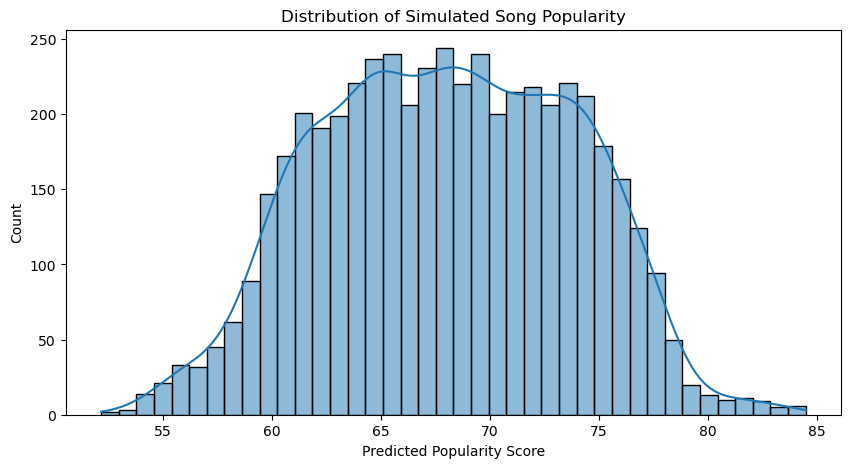

In [67]:

plt.figure(figsize=(10,5))
sns.histplot(sim_df["predicted_popularity"], bins=40, kde=True)
plt.title("Distribution of Simulated Song Popularity")
plt.xlabel("Predicted Popularity Score")
plt.ylabel("Count")
plt.show()


###  I took a data visualizations course and wanted to see an interactive graph of the variabes in comparison! 
First let's see how danceability affects popularity

In [68]:
import altair as alt

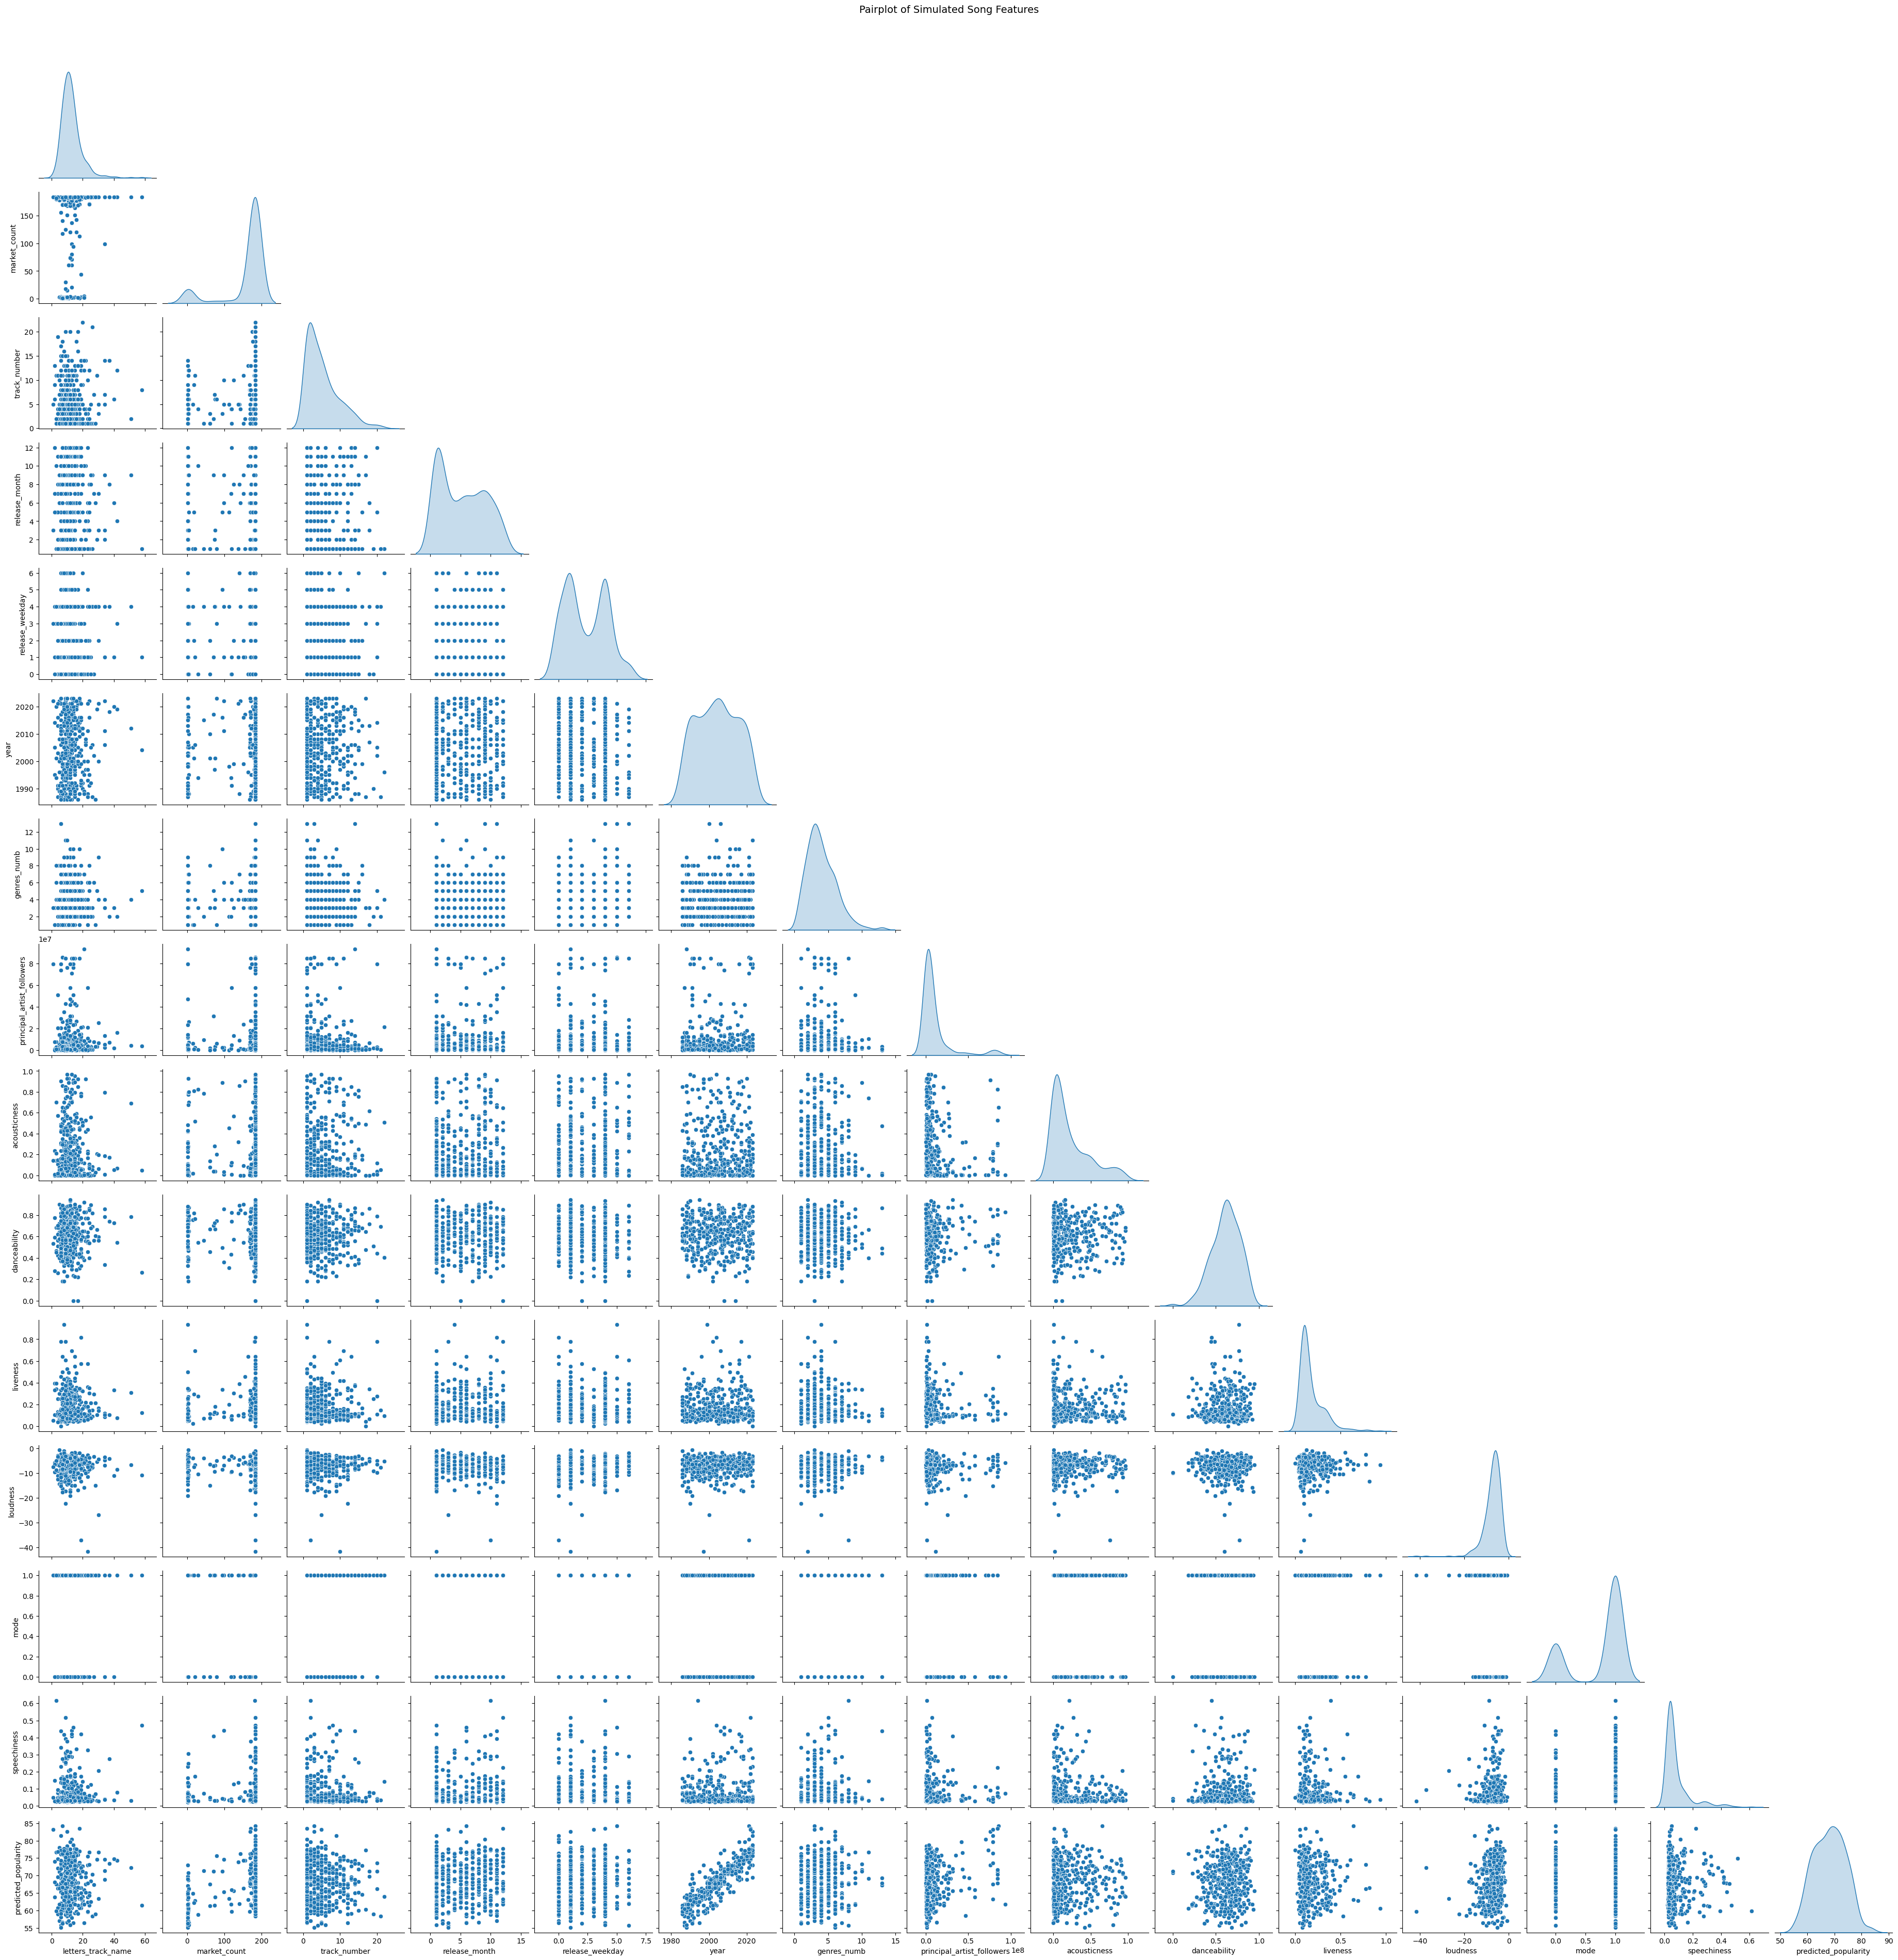

In [69]:
sim_sample = sim_df.sample(400)

sns.pairplot(sim_sample, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Simulated Song Features", y=1.02, fontsize=14)
plt.show()

### Which variables might be correlated?
Using a pairplot we can easily see what variables have a linear relationship with the predicted popularity.

The clearest linear plot I see is with the  year --  I created a zoomed in scatter plot of **popularity vs year** below using altair.

In [70]:
df_sample = df.sample(400)
alt.data_transformers.disable_max_rows()

# Brush for zoom + pan
brush = alt.selection_interval(bind="scales")  


# Create interactive scatterplot
chart = (
    alt.Chart(df_sample)
    .mark_circle(size=80)
    .encode(
        x=alt.X("year:Q", bin=alt.Bin(step=2), title="Release Year"),
        y=alt.Y("popularity:Q", title="Predicted Popularity"),
        tooltip=[
            "track_name:N",
            "year:Q",
            "popularity:Q",
            "danceability:Q",
            "acousticness:Q"
        ]
    )
    .add_params( brush)
    .properties(
        width=800,
        height=700,
        title="Predicted Popularity vs. Release Year (Interactive)"
    )
)

chart


alt.Chart(...)

## popularity vs followers
 above you can see I wanted to see how followers affect popularity, there is not much correlation

In [71]:


def interactive_scatter(df, x_var, y_var, hover_var="track_name"):
    """
    Creates an interactive Altair scatterplot comparing two variables,
    showing song name (or any hover variable) on hover.

    Parameters
    ----------
    df : DataFrame
        Your cleaned dataframe.
    x_var : str
        Column name for x-axis.
    y_var : str
        Column name for y-axis.
    hover_var : str
        Variable to show when hovering (default = track_name).
    """

    chart = (
        alt.Chart(df)
        .mark_circle(size=90)
        .encode(
            x=alt.X(x_var, title=x_var),
            y=alt.Y(y_var, title=y_var),
            tooltip=[hover_var, x_var, y_var]
        )
        .interactive()
        .properties(
            width=600,
            height=400,
            title=f"{x_var} vs {y_var} (Hover to see {hover_var})"
        )
    )
    
    return chart


In [72]:


interactive_scatter(df_sample, "danceability", "popularity", hover_var="track_name")


alt.Chart(...)

In [73]:


interactive_scatter(df_sample, "tempo", "popularity", hover_var="track_name")


alt.Chart(...)

In [74]:

interactive_scatter(df_sample, "time_signature", "popularity", hover_var="track_name")


alt.Chart(...)

Some key outliers are "brown noise" and "Box fan sound" which do not have any time signature or tempo, and therefore have no danceability. I also would argue that some songs such as "Always forever" by Cults are not ranked the best in terms of danceability, I think I could dance to that song!

# Key Conclusions
Overall we found that lots of people tend to listen to music in time_signature 3-4 and some of the best predictors for popularity are artist followers, and the year released.
our simulations found that other variables such as time_signature and danceability can also play a role, yet the effect is less due to smaller values of time signature, and the fact that our data was too broad.

Future simulation projects should focus on more specific genres or audiences that we can target, which could provide more meaningful results instead of being so broad like our project.

We hypothesize that popularity is also affected by other variables such as advertisements, and managing teams, which funnel a lot of money in to create a persona for the artist creating the song.

 More work can be done to run simulations on how we choose the music we listen to.